In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
from sklearn.model_selection import GridSearchCV

In [116]:
!pip install fast_ml --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [206]:
import fast_ml.model_development

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/INTERNSHIP/Lung Cancer ML Internship/survey lung cancer.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [11]:
df['Years_smoked']=[5, 2, 10, 1, 15, 6, 4, 12, 8, 3, 11, 7, 9, 4, 6, 13, 2, 5, 10, 7, 14, 11, 9, 15, 12, 14, 13, 1, 4, 7, 2, 8, 10, 3, 6, 11, 5, 9, 2, 6, 12, 7, 9, 3, 15, 21, 12, 26, 1, 8, 6, 18, 14, 22, 11, 13, 16, 7, 5, 23, 17, 19, 2, 4, 10, 20, 24, 25, 9, 6, 7, 13, 22, 3, 18, 5, 20, 17, 19, 25, 23, 12, 10, 11, 8, 1 , 14, 24, 3, 6, 21, 16, 2, 11, 7, 19, 4, 14, 20, 9, 23, 5, 10, 22, 15, 13, 8, 18, 25, 24, 2, 12, 15, 16, 21, 7, 19, 23, 9, 13, 6, 19, 5, 16, 24, 10, 14, 8, 21, 3, 4, 17, 12, 22, 15, 2, 20, 8, 6, 18, 5, 11, 3, 23, 13, 17, 10, 22, 25, 12, 9, 18, 7, 25, 16, 21, 1, 2, 11, 6, 20, 14, 23, 19, 13, 7, 16, 6, 11, 25, 14, 5, 8, 17, 3, 10, 15, 12, 23, 2, 24, 20, 18, 9, 21, 7, 24, 12, 2, 7, 20, 1, 18, 4, 10, 3, 6, 11, 14, 1 , 15, 9, 13, 3, 2, 5, 12, 17, 22, 9, 2, 6, 16, 4, 3, 19, 11, 8, 21, 13, 1, 4, 7, 10, 18, 5, 3, 14, 16, 2, 12, 7, 1, 22, 4, 6, 13, 17, 10, 19, 8, 3, 3, 20, 9, 7, 21, 1, 5, 8, 4, 16, 13 , 2, 11, 10, 3, 19, 6, 13, 2, 11, 15, 6, 18, 3, 21, 4, 1, 9, 19, 14, 9, 6, 13, 1, 3, 11, 18, 4, 11, 4,16,7,3,20,8,13,2,16,3,18,6,4,14,11,7,18,2,10,3,12,8,15,13,22,4,1,18]
df['Cigarettes_smoked_per_day']=[15, 10, 20, 5 , 30, 12, 8 , 25, 17, 7 , 22, 13, 18, 9 , 14, 27, 6 , 11, 21, 16, 28, 23, 19, 31, 24, 29, 26, 4 , 10, 15, 7 , 18, 23, 8 , 11, 25, 13, 20, 6 , 14, 27, 17, 16, 12, 7, 24, 8, 32, 2, 20, 11, 13, 17, 6, 29, 9, 15, 5, 23, 8, 31, 19, 10, 14, 22, 4, 27, 3, 18, 25, 12, 30, 7, 16, 11, 9, 6, 21, 28, 19, 13, 24, 10, 17, 8, 2, 26, 15, 5, 22, 31, 23, 4, 29, 18, 7, 30, 12, 16, 3, 9, 21, 14, 11, 6, 25, 19, 27, 20, 10, 8, 32, 23, 17, 12, 15, 26, 5, 31, 29, 18, 22, 2, 13, 30, 19, 11, 6, 8, 24, 7, 16, 31, 12, 21, 9, 14, 27, 4, 25, 3, 22, 10, 28, 17, 5, 15, 20, 32, 19, 23, 9, 31, 11, 6, 14, 8, 2, 26, 13, 30, 18, 7, 24, 16, 11, 21, 32, 12, 29, 5, 25, 4, 22, 3, 20, 31, 9, 14, 27, 6, 15, 19, 10, 28, 17, 23, 20, 8, 15, 30, 5, 25, 12, 18, 10, 14, 19, 21, 6, 24, 16, 22, 11, 9, 13, 20, 25, 30, 17, 8, 14, 23, 12, 10, 27, 19, 16, 28, 21, 7, 10, 15, 18, 26, 13, 11, 22, 24, 9, 20, 16, 8, 30, 12, 14, 21, 25, 19, 26, 17, 10, 11, 28, 18, 15, 29, 7, 12, 16, 13, 24, 22, 9, 20, 18, 10, 26, 15, 21, 8, 19, 23, 14, 25, 11, 30, 12, 7, 16, 27, 22, 18, 14, 21, 6, 10, 20, 25, 13, 19, 12, 23, 15, 11, 28, 17, 21, 9, 24, 10, 26, 14, 12, 22, 19, 15, 25, 8, 18, 11, 20, 16, 23, 21, 30, 13, 7, 26]

In [12]:
df['Years_smoked'] =np.where(df['SMOKING']==1,0,df['Years_smoked'])
df['Cigarettes_smoked_per_day']=np.where(df['SMOKING']==1,0,df['Cigarettes_smoked_per_day'])

In [13]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Years_smoked,Cigarettes_smoked_per_day
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.014331,-0.029073
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.718959,0.797466
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,-0.009487,-0.019264
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.097552,0.158292
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.019715,-0.053641
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,-0.173709,-0.156406
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.033701,0.044890
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.004171,0.028448
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,-0.053568,-0.076230
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,-0.001772,-0.039821


In [14]:
hist_data =[df["AGE"].values]
group_labels = ['AGE'] 
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

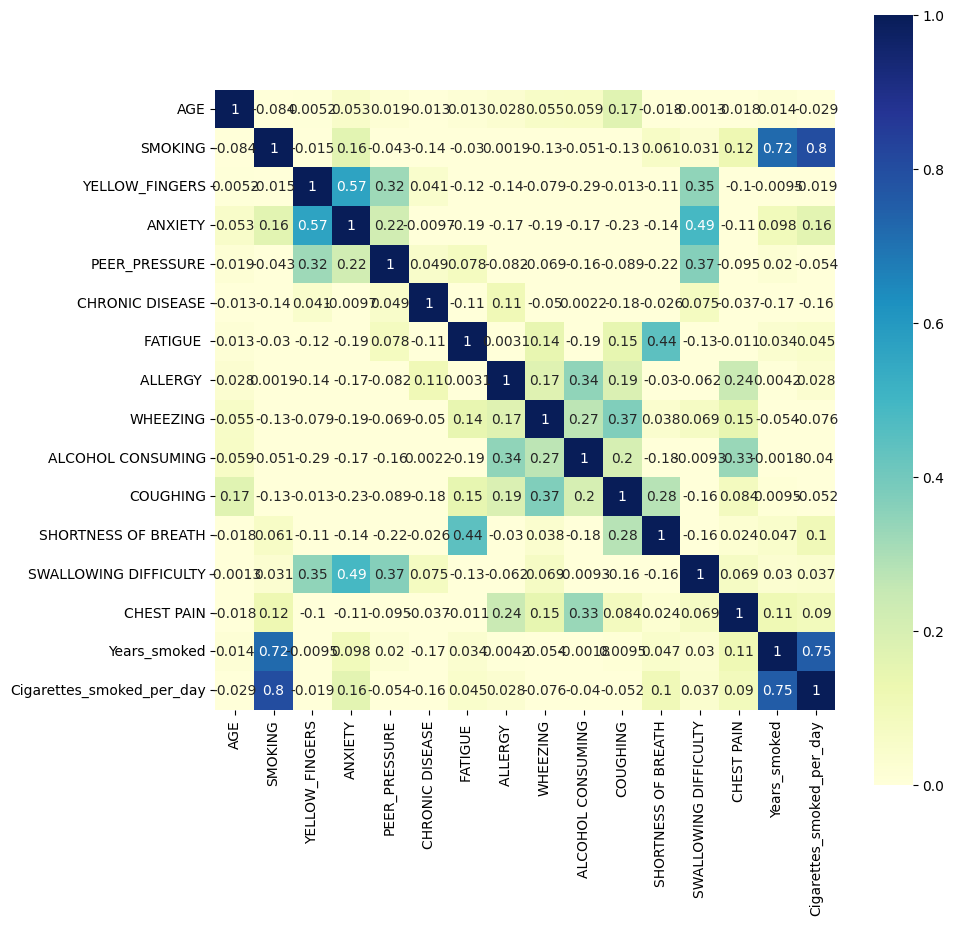

In [15]:
corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

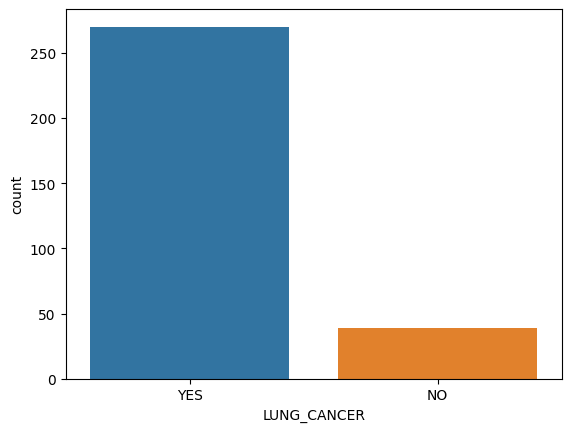

In [16]:
sns.countplot(x = 'LUNG_CANCER',data = df)

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

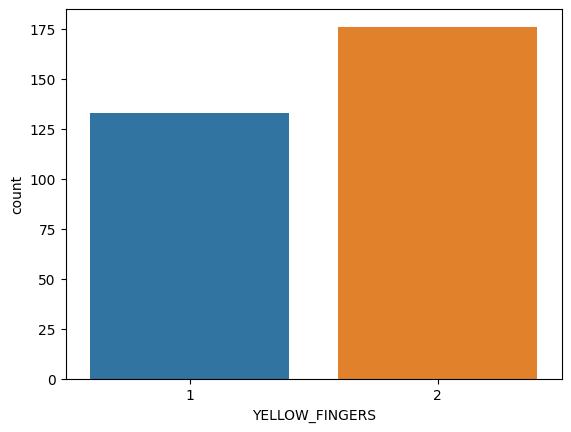

In [17]:
sns.countplot(x = 'YELLOW_FINGERS',data = df)

In [18]:
df['ANXIETY'].unique()

array([2, 1])

In [19]:
df['PEER_PRESSURE'].unique()

array([1, 2])

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

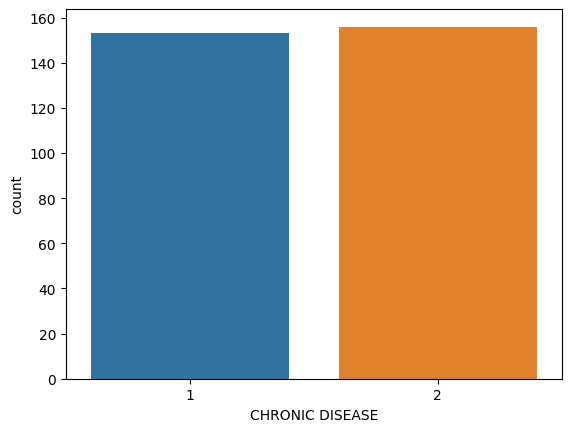

In [20]:
sns.countplot(x = 'CHRONIC DISEASE',data = df)

In [21]:
df['YELLOW_FINGERS'].unique()

array([2, 1])

In [22]:
values = df['LUNG_CANCER'].value_counts().tolist()
names = list(dict(df['LUNG_CANCER'].value_counts()).keys())

px.pie(df, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])


In [23]:
le = preprocessing.LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])


In [24]:
df['GENDER']

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

In [25]:
df['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [26]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Years_smoked,Cigarettes_smoked_per_day
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,0
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,2,10
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1,5
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0,0
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,22,30
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,4,13
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1,7


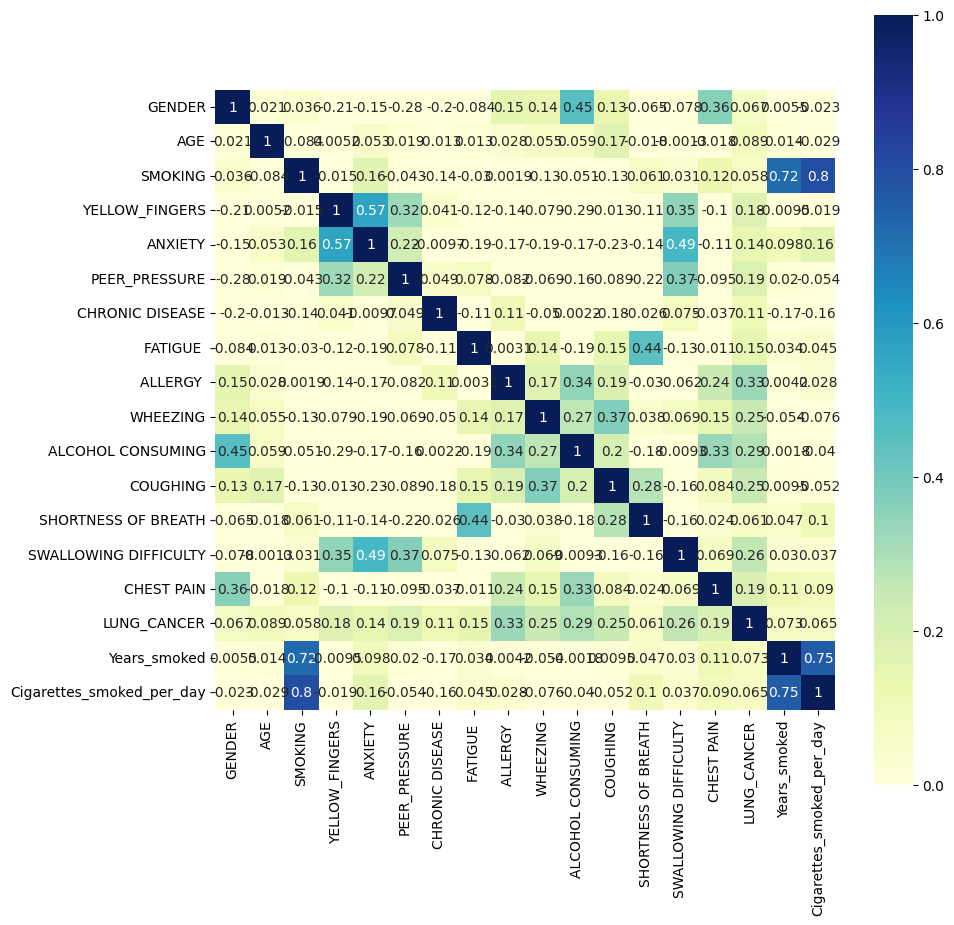

In [27]:
corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

In [28]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Years_smoked,Cigarettes_smoked_per_day
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254,0.005519,-0.022982
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465,0.014331,-0.029073
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179,0.718959,0.797466
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339,-0.009487,-0.019264
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947,0.097552,0.158292
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388,0.019715,-0.053641
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891,-0.173709,-0.156406
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673,0.033701,0.044890
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766,0.004171,0.028448
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300,-0.053568,-0.076230


In [29]:
print(df.corr()["LUNG_CANCER"].sort_values(ascending=False))

LUNG_CANCER                  1.000000
ALLERGY                      0.327766
ALCOHOL CONSUMING            0.288533
SWALLOWING DIFFICULTY        0.259730
WHEEZING                     0.249300
COUGHING                     0.248570
CHEST PAIN                   0.190451
PEER_PRESSURE                0.186388
YELLOW_FINGERS               0.181339
FATIGUE                      0.150673
ANXIETY                      0.144947
CHRONIC DISEASE              0.110891
AGE                          0.089465
Years_smoked                 0.072686
GENDER                       0.067254
Cigarettes_smoked_per_day    0.064948
SHORTNESS OF BREATH          0.060738
SMOKING                      0.058179
Name: LUNG_CANCER, dtype: float64


In [30]:
X = df.drop(['LUNG_CANCER'],axis=1)

In [31]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Years_smoked,Cigarettes_smoked_per_day
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,0
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2,10
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,5
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0,0
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,22,30
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,4,13
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,7


In [32]:
y=df['LUNG_CANCER']

In [33]:
y


0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

**Method 1**  (Normal method)

In [34]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

X_valid,X_test,y_valid,y_test = train_test_split(X_rem,y_rem,test_size=0.5)

**Method 2**(using fast_ml)

In [36]:
X_train,y_train,X_valid,y_valid,X_test,y_test = train_valid_test_split(df, target = 'LUNG_CANCER',method='random',train_size=0.6,valid_size=0.2,test_size=0.2) 

**KNeighbors Classifier**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  87.09677419354838 

*Confusion Matrix for KNN: 
[[ 0  7]
 [ 1 54]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      0.98      0.93        55

    accuracy                           0.87        62
   macro avg       0.44      0.49      0.47        62
weighted avg       0.79      0.87      0.83        62



In [38]:
val_predic = KNN.predict(X_valid)
vals3 = (accuracy_score(y_valid, val_predic)*100)
print("*Accuracy score for KNN: ", vals3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_valid, val_predic))
print("*Classification Report for KNN: ")
print(classification_report(y_valid, val_predic))

*Accuracy score for KNN:  80.64516129032258 

*Confusion Matrix for KNN: 
[[ 2 12]
 [ 0 48]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.80      1.00      0.89        48

    accuracy                           0.81        62
   macro avg       0.90      0.57      0.57        62
weighted avg       0.85      0.81      0.74        62



In [39]:
y_pred_knn = KNN.predict(X_test)
cm01 = confusion_matrix(y_test, y_pred_knn)
cm01
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm01[0][0]/(cm01[0][0] + cm01[0][1])
precision_knn = cm01[0][0]/(cm01[0][0]+cm01[1][1])
recall_knn,precision_knn

Accuracy : 0.8709677419354839


(0.0, 0.0)

In [40]:
y_pred_knns = KNN.predict(X_valid)
cm02 = confusion_matrix(y_valid, y_pred_knns)
cm02
knn_results = accuracy_score(y_valid,y_pred_knn)
print("Accuracy :",knn_results)
recall_knns = cm02[0][0]/(cm02[0][0] + cm02[0][1])
precision_knns = cm02[0][0]/(cm02[0][0]+cm02[1][1])
recall_knns,precision_knns

Accuracy : 0.7580645161290323


(0.14285714285714285, 0.04)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN,X_train,y_train)

array([0.89189189, 0.91891892, 0.89189189, 0.89189189, 0.89189189])

<Axes: >

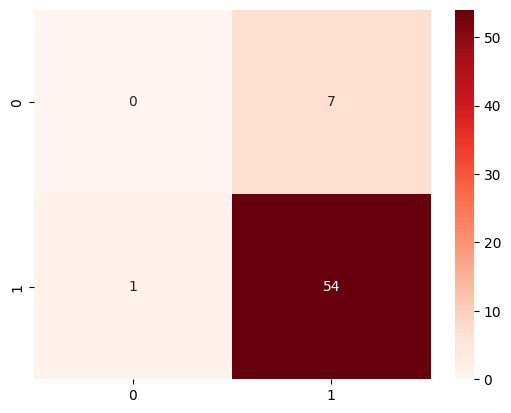

In [42]:
sns.heatmap(cm01,cmap = 'Reds',annot = True)

<Axes: >

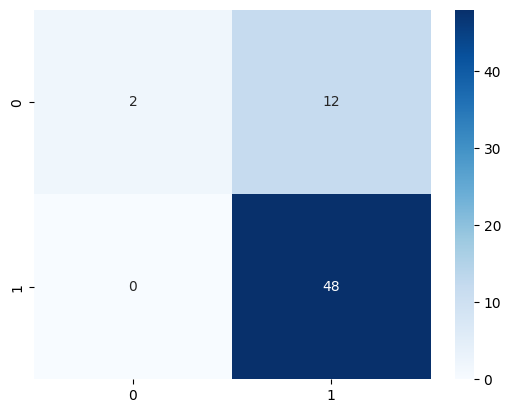

In [43]:
sns.heatmap(cm02,cmap = 'Blues',annot = True)

**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
predictions = log.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val7, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  88.70967741935483 

*Confusion Matrix for Logistic Regression: 
[[ 1  6]
 [ 1 54]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.90      0.98      0.94        55

    accuracy                           0.89        62
   macro avg       0.70      0.56      0.58        62
weighted avg       0.85      0.89      0.86        62



In [45]:
log.fit(X_train, y_train)
predictions = log.predict(X_valid)
vals7 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for Logistic Regression: ", vals7, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_valid, predictions))

*Accuracy score for Logistic Regression:  83.87096774193549 

*Confusion Matrix for Logistic Regression: 
[[ 5  9]
 [ 1 47]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.84      0.98      0.90        48

    accuracy                           0.84        62
   macro avg       0.84      0.67      0.70        62
weighted avg       0.84      0.84      0.81        62



In [46]:
y_pred_log = log.predict(X_test)
cm11 = confusion_matrix(y_test, y_pred_log)
cm11
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm11[0][0]/(cm11[0][0] + cm11[0][1])
precision_log = cm11[0][0]/(cm11[0][0]+cm11[1][1])
recall_log,precision_log

Accuracy : 0.8870967741935484


(0.14285714285714285, 0.01818181818181818)

In [47]:
y_pred_logs = log.predict(X_valid)
cm12 = confusion_matrix(y_valid, y_pred_logs)
cm12
log_results = accuracy_score(y_valid,y_pred_log)
print("Accuracy :",log_results)
recall_logs = cm12[0][0]/(cm12[0][0] + cm12[0][1])
precision_logs = cm12[0][0]/(cm12[0][0]+cm12[1][1])
recall_logs,precision_logs

Accuracy : 0.7741935483870968


(0.35714285714285715, 0.09615384615384616)

In [48]:
cross_val_score(log,X_train,y_train)

array([0.89189189, 0.89189189, 0.89189189, 0.89189189, 0.86486486])

<Axes: >

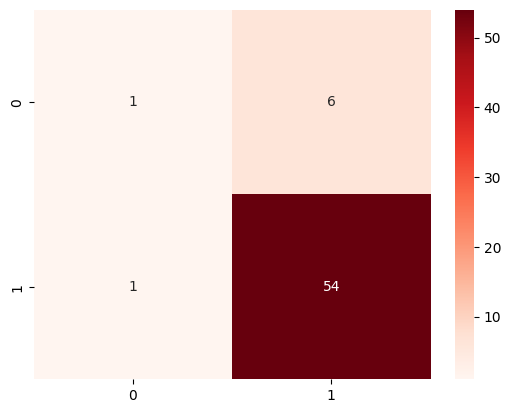

In [49]:
sns.heatmap(cm11,cmap = 'Reds',annot = True)

<Axes: >

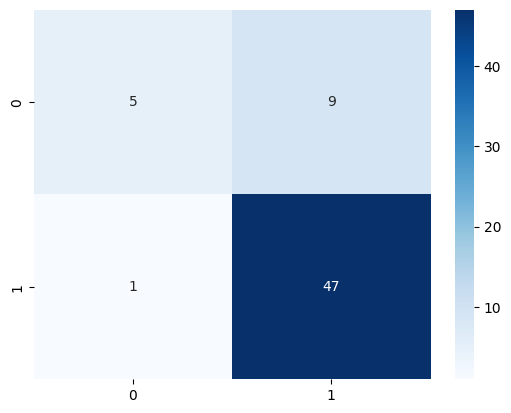

In [50]:
sns.heatmap(cm12,cmap = 'Blues',annot = True)

SVM

In [51]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  88.70967741935483 

*Confusion Matrix for SVM: 
[[ 0  7]
 [ 0 55]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



In [52]:
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_valid)
vals1 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_valid, predictions))

*Accuracy score for SVM:  88.70967741935483 

*Confusion Matrix for SVM: 
[[ 0 14]
 [ 0 48]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [53]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm21 = confusion_matrix(y_test, y_pred_svm)
cm21
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm21[0][0]/(cm21[0][0] + cm21[0][1])
precision_svm = cm21[0][0]/(cm21[0][0]+cm21[1][1])
recall_svm,precision_svm

Accuracy : 0.8870967741935484


(0.0, 0.0)

In [54]:
y_pred_svms = SVM.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm22= confusion_matrix(y_valid, y_pred_svms)
cm22
svm_results = accuracy_score(y_valid,y_pred_svm)
print("Accuracy :",svm_results)
recall_svms = cm22[0][0]/(cm22[0][0] + cm22[0][1])
precision_svms= cm22[0][0]/(cm22[0][0]+cm22[1][1])
recall_svms,precision_svms

Accuracy : 0.7741935483870968


(0.0, 0.0)

In [55]:
cross_val_score(SVM,X_train,y_train)

array([0.91891892, 0.91891892, 0.89189189, 0.89189189, 0.89189189])

<Axes: >

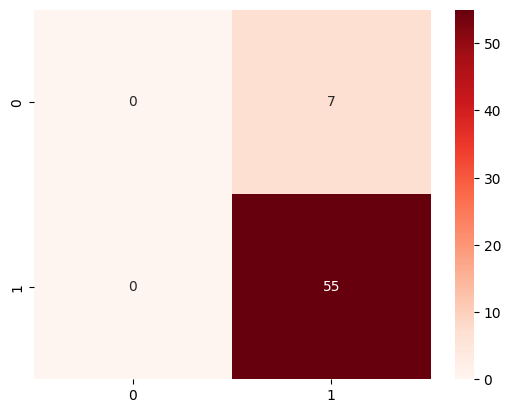

In [56]:
sns.heatmap(cm21,cmap = 'Reds',annot = True)

<Axes: >

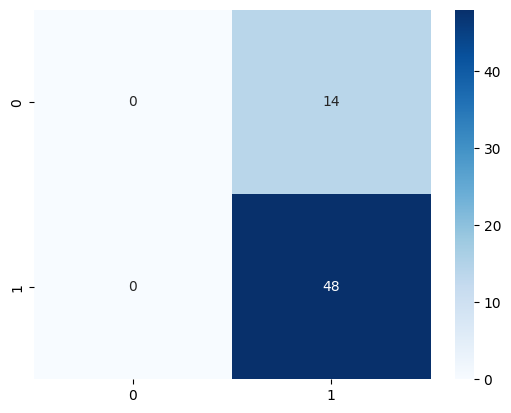

In [57]:
sns.heatmap(cm22,cmap = 'Blues',annot = True)

Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  90.32258064516128 

*Confusion Matrix for RF: 
[[ 2  5]
 [ 1 54]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.92      0.98      0.95        55

    accuracy                           0.90        62
   macro avg       0.79      0.63      0.67        62
weighted avg       0.89      0.90      0.89        62



In [59]:
RF.fit(X_train, y_train)
predictions = RF.predict(X_valid)
vals2 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for RF: ", vals2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_valid, predictions))

*Accuracy score for RF:  87.09677419354838 

*Confusion Matrix for RF: 
[[ 7  7]
 [ 1 47]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.87      0.98      0.92        48

    accuracy                           0.87        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.87      0.87      0.86        62



In [60]:
y_pred_rf = RF.predict(X_test)
cm31 = confusion_matrix(y_test, y_pred_rf)
cm31
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm31[0][0]/(cm31[0][0] + cm31[0][1])
precision_rf = cm31[0][0]/(cm31[0][0]+cm31[1][1])
recall_rf,precision_rf

Accuracy : 0.9032258064516129


(0.2857142857142857, 0.03571428571428571)

In [61]:
y_pred_rfs = RF.predict(X_valid)
cm32 = confusion_matrix(y_valid, y_pred_rf)
cm32
rf_results = accuracy_score(y_valid,y_pred_rfs)
print("Accuracy :",rf_results)
recall_rfs = cm32[0][0]/(cm32[0][0] + cm32[0][1])
precision_rfs = cm32[0][0]/(cm32[0][0]+cm32[1][1])
recall_rfs,precision_rfs

Accuracy : 0.8709677419354839


(0.07142857142857142, 0.02127659574468085)

In [62]:
cross_val_score(RF,X_train,y_train)

array([0.89189189, 0.91891892, 0.89189189, 0.89189189, 0.89189189])

<Axes: >

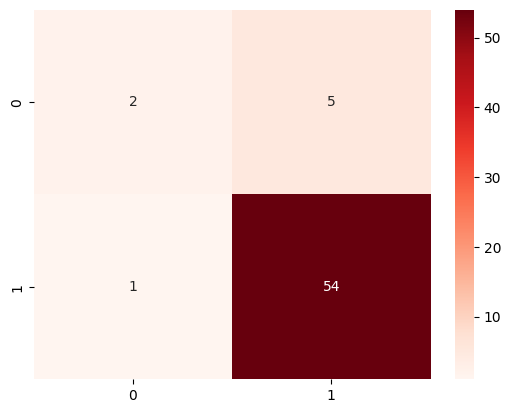

In [63]:
sns.heatmap(cm31,cmap = 'Reds',annot = True)

<Axes: >

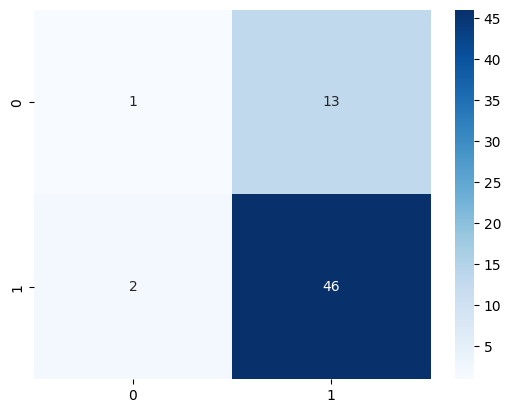

In [64]:
sns.heatmap(cm32,cmap = 'Blues',annot = True)

**ANN**

In [65]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(X_train, y_train)
predictions = ANN.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for ANN: ", val4, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_test, predictions))

*Accuracy score for ANN:  88.70967741935483 

*Confusion Matrix for ANN: 
[[ 0  7]
 [ 0 55]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



In [158]:
ANN.fit(X_train, y_train)
predictions = ANN.predict(X_valid)
vals4 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for ANN: ", vals4, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_valid, predictions))

*Accuracy score for ANN:  77.41935483870968 

*Confusion Matrix for ANN: 
[[ 0 14]
 [ 0 48]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [67]:
y_pred_ann = ANN.predict(X_test)
cm41 = confusion_matrix(y_test, y_pred_ann)
cm41
ann_result = accuracy_score(y_test,y_pred_ann)
print("Accuracy :",ann_result)
recall_ann = cm41[0][0]/(cm41[0][0] + cm41[0][1])
precision_ann = cm41[0][0]/(cm41[0][0]+cm41[1][1])
recall_ann,precision_ann

Accuracy : 0.8870967741935484


(0.0, 0.0)

In [68]:
y_pred_anns = ANN.predict(X_valid)
cm42 = confusion_matrix(y_valid, y_pred_anns)
cm42
ann_results = accuracy_score(y_valid,y_pred_ann)
print("Accuracy :",ann_results)
recall_anns = cm42[0][0]/(cm42[0][0] + cm42[0][1])
precision_anns = cm42[0][0]/(cm42[0][0]+cm42[1][1])
recall_anns,precision_anns

Accuracy : 0.7741935483870968


(0.0, 0.0)

In [69]:
cross_val_score(ANN,X_train,y_train)

array([0.91891892, 0.91891892, 0.89189189, 0.89189189, 0.89189189])

<Axes: >

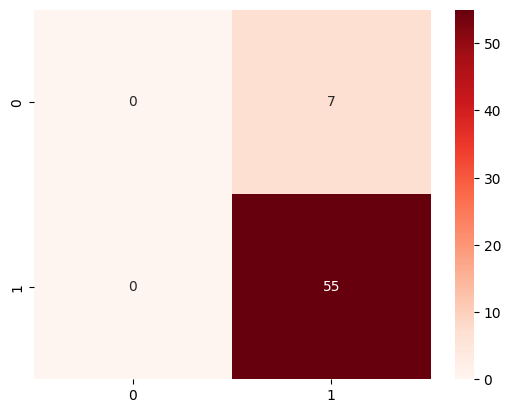

In [70]:
sns.heatmap(cm41,cmap = 'Reds',annot = True)

<Axes: >

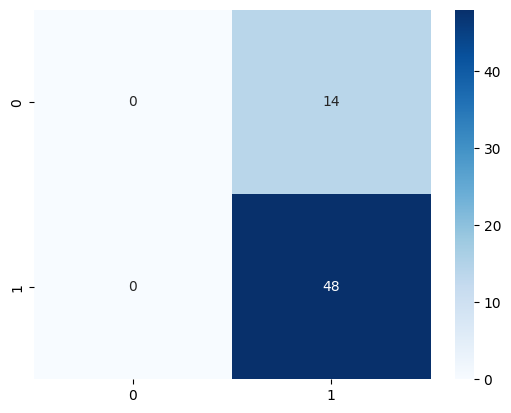

In [71]:
sns.heatmap(cm42,cmap = 'Blues',annot = True)

Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
DS = DecisionTreeClassifier(random_state=0)
DS.fit(X_train, y_train)
predictions = DS.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val8, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictions))


*Accuracy score for Decision Tree:  83.87096774193549 

*Confusion Matrix for Decision Tree: 
[[ 1  6]
 [ 4 51]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.89      0.93      0.91        55

    accuracy                           0.84        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.82      0.84      0.83        62



In [73]:
DS.fit(X_train, y_train)
predictions = DS.predict(X_valid)
vals8 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for Decision Tree: ", val8, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_valid, predictions))


*Accuracy score for Decision Tree:  83.87096774193549 

*Confusion Matrix for Decision Tree: 
[[ 5  9]
 [ 0 48]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        14
           1       0.84      1.00      0.91        48

    accuracy                           0.85        62
   macro avg       0.92      0.68      0.72        62
weighted avg       0.88      0.85      0.83        62



In [74]:
y_pred_dc =DS.predict(X_test)
cm51 = confusion_matrix(y_test, y_pred_dc)
cm51
dc_result = accuracy_score(y_test,y_pred_dc)
print("Accuracy :",dc_result)
recall_dc = cm51[0][0]/(cm51[0][0] + cm51[0][1])
precision_dc = cm51[0][0]/(cm51[0][0]+cm51[1][1])
recall_dc,precision_dc

Accuracy : 0.8387096774193549


(0.14285714285714285, 0.019230769230769232)

In [75]:

y_pred_dcs = DS.predict(X_valid)
cm52 = confusion_matrix(y_valid, y_pred_dc)
cm52
dc_results = accuracy_score(y_valid,y_pred_dcs)
print("Accuracy :",dc_results)
recall_dcs = cm52[0][0]/(cm52[0][0] + cm52[0][1])
precision_dcs = cm52[0][0]/(cm52[0][0]+cm52[1][1])
recall_dcs,precision_dcs

Accuracy : 0.8548387096774194


(0.14285714285714285, 0.0425531914893617)

In [76]:
cross_val_score(DS,X_train,y_train)

array([0.89189189, 0.86486486, 0.81081081, 0.81081081, 0.89189189])

<Axes: >

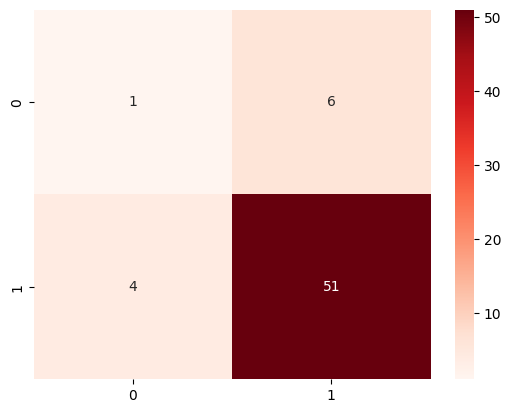

In [77]:
sns.heatmap(cm51,cmap = 'Reds',annot = True)

<Axes: >

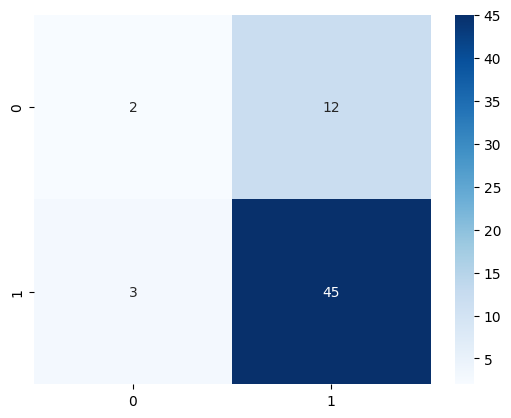

In [78]:
sns.heatmap(cm52,cmap = 'Blues',annot = True)

**Accuracy Comparision**

In [79]:
score = [val1,val2,val3,val4,val7,val8]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','ANN','Logistic Regression','Decision Tree')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5]
[88.70967741935483, 90.32258064516128, 87.09677419354838, 88.70967741935483, 88.70967741935483, 83.87096774193549]


In [80]:
scores = [vals1,vals2,vals3,vals4,vals7,vals8]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','ANN','Logistic Regression','Decision Tree')
y_poss = np.arange(len(classifier))
print(y_poss)
print(scores)

[0 1 2 3 4 5]
[77.41935483870968, 87.09677419354838, 80.64516129032258, 77.41935483870968, 83.87096774193549, 85.48387096774194]


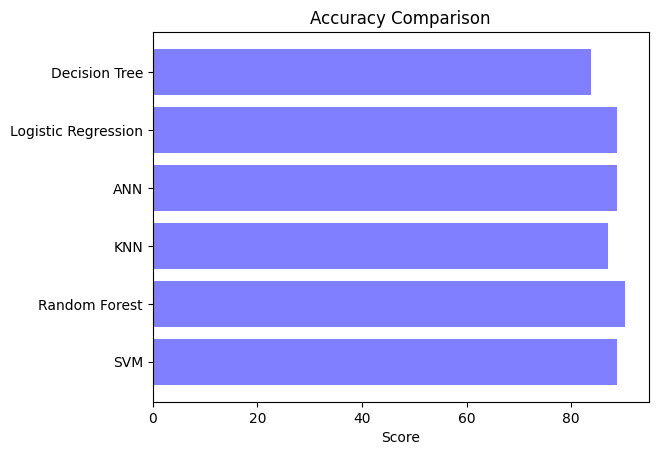

In [81]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

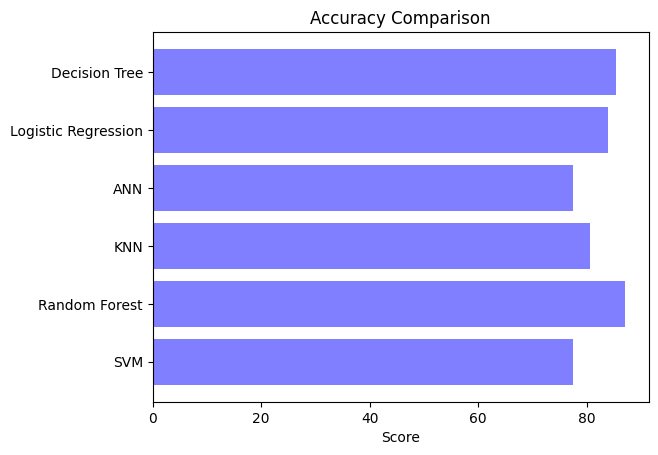

In [82]:
import matplotlib.pyplot as plt2
plt2.barh(y_poss,scores, align='center', alpha=0.5,color='blue')
plt2.yticks(y_poss, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [83]:
results ={'Accuracy': [svm_result*100,rf_result*100,knn_result*100,ann_result*100,log_result*100,dc_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_knn*100,recall_ann*100,recall_log*100,recall_dc*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_knn*100,precision_ann*100,precision_log*100,precision_dc*100]}
index = ['SVM','Random Forest','KNN','ANN','Logistic Regression','Decision Tree']

In [84]:
result ={'Accuracy': [svm_results*100,rf_results*100,knn_results*100,ann_results*100,log_results*100,dc_results*100],
 'Recall':[recall_svms*100,recall_rfs*100,recall_knns*100,recall_anns*100,recall_logs*100,recall_dcs*100],
 'Precision': [precision_svms*100,precision_rfs*100,precision_knns*100,precision_anns*100,precision_logs*100,precision_dcs*100]}
index = ['SVM','Random Forest','KNN','ANN','Logistic Regression','Decision Tree']

In [85]:
results =pd.DataFrame(results,index=index)

In [86]:
result =pd.DataFrame(result,index=index)

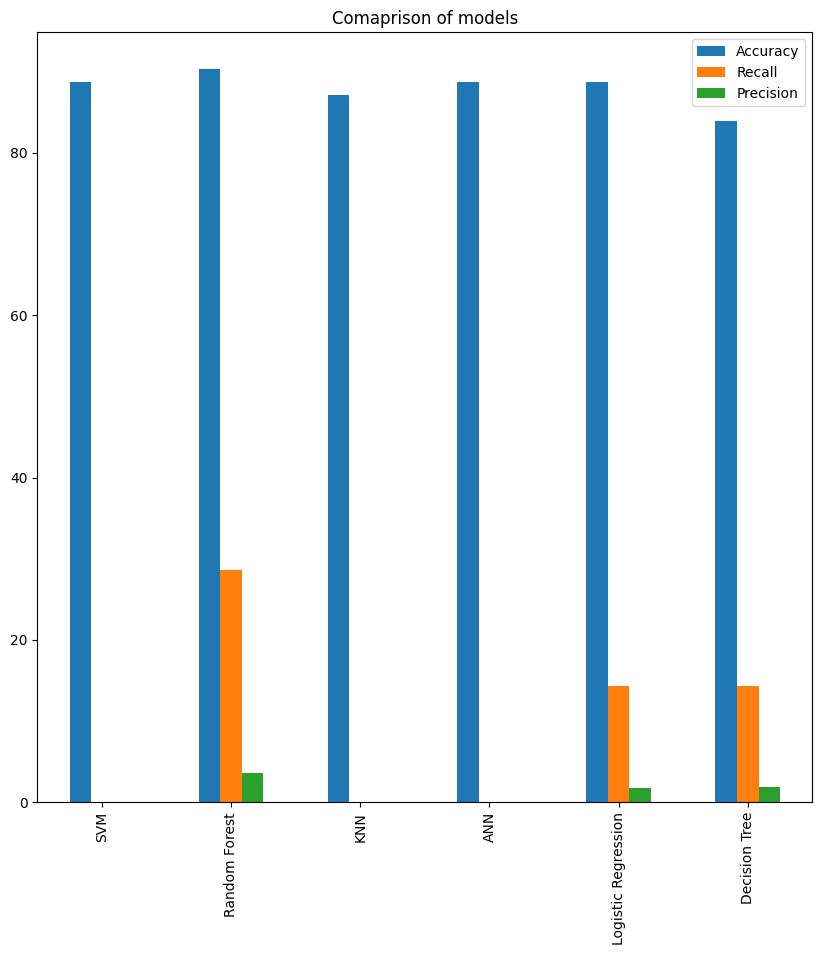

In [87]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(10,10)).get_figure()


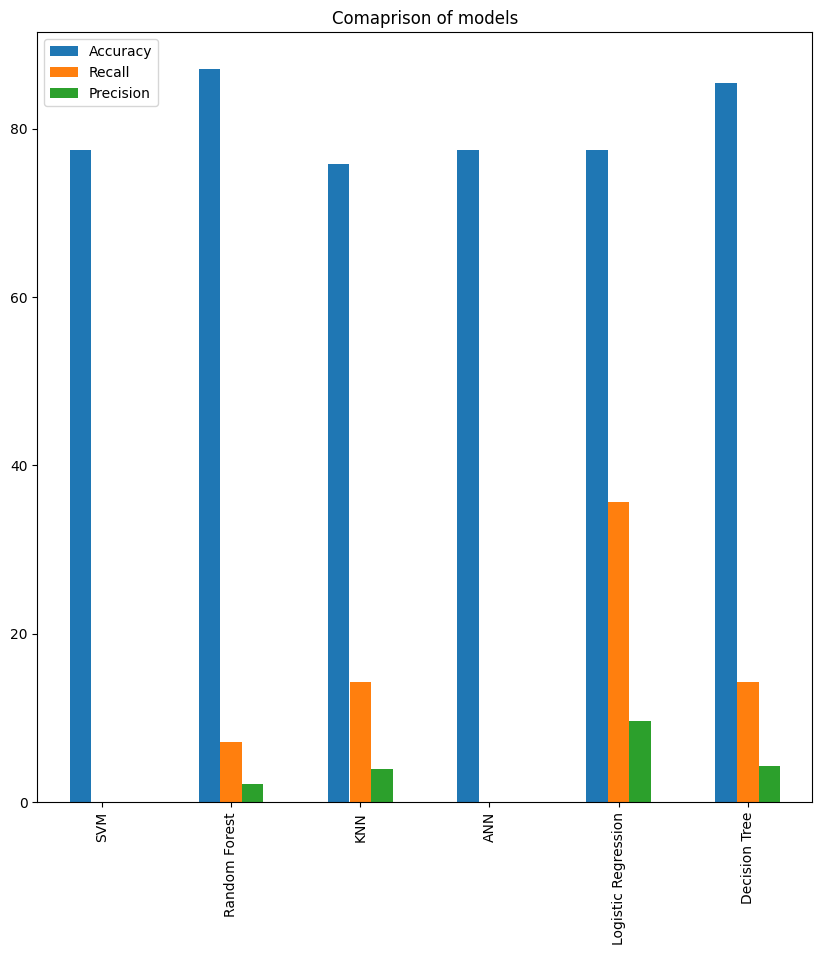

In [88]:
fig =result.plot(kind='bar',title='Comaprison of models',figsize =(10,10)).get_figure()


**HYPER PARAMETER TUNING**

**Random Forest**

In [89]:
import numpy as np

In [90]:
mf_range=np.arange(1,6,1)
ne_range=np.arange(10,210,10)
pg=dict(max_features=mf_range,n_estimators=ne_range)

In [91]:
gridr = GridSearchCV(estimator=RF,param_grid=pg,cv=5)


In [92]:
gridr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [93]:
print(gridr.best_params_,gridr.best_score_)

{'max_features': 1, 'n_estimators': 60} 0.9027027027027028


In [173]:
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier(n_estimators=60,max_features=1)
RF1.fit(X_train, y_train)
predictions = RF1.predict(X_test)
val02 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val02, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  88.70967741935483 

*Confusion Matrix for RF: 
[[ 1  6]
 [ 1 54]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.90      0.98      0.94        55

    accuracy                           0.89        62
   macro avg       0.70      0.56      0.58        62
weighted avg       0.85      0.89      0.86        62



In [174]:
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier(n_estimators=60,max_features=1)
RF1.fit(X_train, y_train)
predictions = RF1.predict(X_valid)
vals02 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for RF: ", vals02, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_valid, predictions))

*Accuracy score for RF:  82.25806451612904 

*Confusion Matrix for RF: 
[[ 3 11]
 [ 0 48]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.81      1.00      0.90        48

    accuracy                           0.82        62
   macro avg       0.91      0.61      0.63        62
weighted avg       0.86      0.82      0.77        62



In [196]:
y_pred_rfr = RF1.predict(X_test)
cm31 = confusion_matrix(y_test, y_pred_rfr)
cm31
rf_resultr = accuracy_score(y_test,y_pred_rfr)
print("Accuracy :",rf_resultr)
recall_rfr = cm31[0][0]/(cm31[0][0] + cm31[0][1])
precision_rfr= cm31[0][0]/(cm31[0][0]+cm31[1][1])
recall_rfr,precision_rfr

Accuracy : 0.8870967741935484


(0.14285714285714285, 0.01818181818181818)

In [195]:
y_pred_rfrs = RF.predict(X_valid)
cm32 = confusion_matrix(y_valid, y_pred_rfrs)
cm32
rf_resultrs = accuracy_score(y_valid,y_pred_rfrs)
print("Accuracy :",rf_resultrs)
recall_rfrs = cm31[0][0]/(cm31[0][0] + cm31[0][1])
precision_rfrs = cm31[0][0]/(cm31[0][0]+cm31[1][1])
recall_rfrs,precision_rfrs

Accuracy : 0.8387096774193549


(0.2857142857142857, 0.03571428571428571)

In [175]:
import pandas as pd


In [176]:
grid_results = pd.concat([pd.DataFrame(gridr.cv_results_["params"]),pd.DataFrame(gridr.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results

,max_features,n_estimators,Accuracy
0,1,10,0.897297
1,1,20,0.891892
2,1,30,0.891892
3,1,40,0.891892
4,1,50,0.897297
...,...,...,...
95,5,160,0.891892
96,5,170,0.891892
97,5,180,0.891892
98,5,190,0.897297


In [96]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.897297
             20            0.891892
             30            0.891892
             40            0.891892
             50            0.897297
...                             ...
5            160           0.891892
             170           0.891892
             180           0.891892
             190           0.897297
             200           0.897297

[100 rows x 1 columns]

In [97]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.897297  0.891892  0.891892  0.891892  0.897297  0.902703   
2             0.864865  0.875676  0.881081  0.881081  0.891892  0.891892   
3             0.864865  0.875676  0.881081  0.881081  0.886486  0.881081   
4             0.881081  0.886486  0.886486  0.881081  0.891892  0.886486   
5             0.886486  0.886486  0.891892  0.891892  0.897297  0.897297   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.902703  0.902703  0.897297  0.902703  0.902703  0.897297   
2             0.897297  0.897297  0.897297  0.891892  0.897297  0.891892   
3             0.886486  0.886486  0.886486  0.886486  0.886486  0.891892   
4             0.891892  0.891892  0.891892  0.897297  0.897297  0.891892   
5             0.897297  0.897297  0.897297  0.897297  0.897297  0.897297   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.902703  0.902703  0.902703  0.902703  0.902703  0.897297   
2             0.897297  0.897297  0.897297  0.897297  0.902703  0.902703   
3             0.886486  0.886486  0.886486  0.886486  0.886486  0.886486   
4             0.886486  0.886486  0.891892  0.897297  0.897297  0.891892   
5             0.897297  0.891892  0.891892  0.891892  0.891892  0.891892   

                                  
n_estimators       190       200  
max_features                      
1             0.897297  0.897297  
2             0.902703  0.902703  
3             0.886486  0.891892  
4             0.897297  0.897297  
5             0.897297  0.897297

**Logistic Regression**

In [98]:
c_space = np.logspace(-5, 8, 15)
pg={'C':c_space}
gridl=GridSearchCV(log,pg,cv=5)

In [99]:
gridl.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [100]:
print(gridl.best_params_,gridl.best_score_)

{'C': 1e-05} 0.9027027027027028


In [101]:
gridl_results = pd.concat([pd.DataFrame(gridl.cv_results_["params"]),pd.DataFrame(gridl.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
gridl_results

,C,Accuracy
0,1.000000e-05,0.902703
1,8.483429e-05,0.902703
2,7.196857e-04,0.902703
3,6.105402e-03,0.902703
4,5.179475e-02,0.902703
5,4.393971e-01,0.886486
6,3.727594e+00,0.897297
7,3.162278e+01,0.864865
8,2.682696e+02,0.870270
9,2.275846e+03,0.854054


In [177]:
log1 = LogisticRegression(C = 1.000000e-05)
log1.fit(X_train, y_train)
predictions = log1.predict(X_test)
val07 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val07, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  88.70967741935483 

*Confusion Matrix for Logistic Regression: 
[[ 0  7]
 [ 0 55]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



In [178]:
log1 = LogisticRegression(C = 1.000000e-05)
log1.fit(X_train, y_train)
predictionsl = log1.predict(X_valid)
vals07 = (accuracy_score(y_valid, predictionsl)*100)
print("*Accuracy score for Logistic Regression: ", vals07, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_valid, predictionsl))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_valid, predictionsl))

*Accuracy score for Logistic Regression:  77.41935483870968 

*Confusion Matrix for Logistic Regression: 
[[ 0 14]
 [ 0 48]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [191]:
y_pred_logl = log1.predict(X_test)
cm11 = confusion_matrix(y_test, y_pred_logl)
cm11
log_resultl = accuracy_score(y_test,y_pred_logl)
print("Accuracy :",log_resultl)
recall_logl = cm11[0][0]/(cm11[0][0] + cm11[0][1])
precision_logl = cm11[0][0]/(cm11[0][0]+cm11[1][1])
recall_logl,precision_logl

Accuracy : 0.8870967741935484


(0.0, 0.0)

In [192]:
y_pred_logls = log1.predict(X_valid)
cm12 = confusion_matrix(y_valid, y_pred_logls)
cm12
log_resultls = accuracy_score(y_valid,y_pred_logls)
print("Accuracy :",log_resultls)
recall_logls = cm11[0][0]/(cm11[0][0] + cm11[0][1])
precision_logls = cm11[0][0]/(cm11[0][0]+cm11[1][1])
recall_logls,precision_logls

Accuracy : 0.7741935483870968


(0.0, 0.0)

**Decosion Tree**

In [102]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [103]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
gridt=RandomizedSearchCV(DS,param_dist,cv=5)


In [104]:
gridt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0df93e65b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0df985ec10>})

In [105]:
print(gridt.best_params_,gridt.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3} 0.9027027027027028


In [106]:
gridt_results = pd.concat([pd.DataFrame(gridt.cv_results_["params"]),pd.DataFrame(gridt.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
gridt_results

,criterion,max_depth,max_features,min_samples_leaf,Accuracy
0,gini,3.0,6,2,0.886486
1,gini,NaN,3,3,0.864865
2,entropy,NaN,8,4,0.886486
3,gini,NaN,3,2,0.832432
4,gini,NaN,5,8,0.891892
5,gini,NaN,1,4,0.886486
6,entropy,3.0,3,3,0.902703
7,gini,NaN,3,7,0.897297
8,gini,3.0,2,5,0.886486
9,gini,NaN,7,4,0.891892


In [179]:
DS1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 3, min_samples_leaf= 3)
DS1.fit(X_train, y_train)
predictiond = DS1.predict(X_test)
val08 = (accuracy_score(y_test, predictiond)*100)
print("*Accuracy score for Decision Tree: ", val08, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictiond))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictiond))


*Accuracy score for Decision Tree:  88.70967741935483 

*Confusion Matrix for Decision Tree: 
[[ 0  7]
 [ 0 55]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



In [180]:
DS1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 3, min_samples_leaf= 3,random_state=0)
DS1.fit(X_train, y_train)
predictiond1 = DS1.predict(X_valid)
vals08 = (accuracy_score(y_valid, predictiond1)*100)
print("*Accuracy score for Decision Tree: ", vals08, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_valid, predictiond1))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_valid, predictiond1))


*Accuracy score for Decision Tree:  77.41935483870968 

*Confusion Matrix for Decision Tree: 
[[ 0 14]
 [ 0 48]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [197]:
y_pred_dcd =DS1.predict(X_test)
cm51 = confusion_matrix(y_test, y_pred_dcd)
cm51
dc_resultd = accuracy_score(y_test,y_pred_dcd)
print("Accuracy :",dc_resultd)
recall_dcd = cm51[0][0]/(cm51[0][0] + cm51[0][1])
precision_dcd = cm51[0][0]/(cm51[0][0]+cm51[1][1])
recall_dcd,precision_dcd

Accuracy : 0.8870967741935484


(0.0, 0.0)

In [198]:
y_pred_dcds =DS1.predict(X_valid)
cm52 = confusion_matrix(y_valid, y_pred_dcds)
cm52
dc_resultds = accuracy_score(y_valid,y_pred_dcds)
print("Accuracy :",dc_resultds)
recall_dcds = cm51[0][0]/(cm51[0][0] + cm51[0][1])
precision_dcds = cm51[0][0]/(cm51[0][0]+cm51[1][1])
recall_dcds,precision_dcds

Accuracy : 0.7741935483870968


(0.0, 0.0)

**SVM**

In [107]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grids = GridSearchCV(SVC(), param_grid, refit = True, cv = 3)
  
grids.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [108]:
print(grids.best_params_,grids.best_score_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'} 0.9026969857218403


In [181]:
SVM1 = SVC(C = 0.1, gamma = 1, kernel= 'rbf')
SVM1.fit(X_train, y_train)
predictions = SVM1.predict(X_test)
val01 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val01, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  88.70967741935483 

*Confusion Matrix for SVM: 
[[ 0  7]
 [ 0 55]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



In [182]:
SVM1 = SVC(C = 0.1, gamma = 1, kernel= 'rbf')
SVM1.fit(X_train, y_train)
predictions = SVM1.predict(X_valid)
vals01 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for SVM: ", vals01, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_valid, predictions))

*Accuracy score for SVM:  77.41935483870968 

*Confusion Matrix for SVM: 
[[ 0 14]
 [ 0 48]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [193]:
y_pred_svmv = SVM1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm21 = confusion_matrix(y_test, y_pred_svmv)
cm21
svm_resultv = accuracy_score(y_test,y_pred_svmv)
print("Accuracy :",svm_resultv)
recall_svmv = cm21[0][0]/(cm21[0][0] + cm21[0][1])
precision_svmv = cm21[0][0]/(cm21[0][0]+cm21[1][1])
recall_svmv,precision_svmv

Accuracy : 0.8870967741935484


(0.0, 0.0)

In [194]:
y_pred_svmvs = SVM1.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm22 = confusion_matrix(y_valid, y_pred_svmvs)
cm22
svm_resultvs = accuracy_score(y_valid,y_pred_svmvs)
print("Accuracy :",svm_resultvs)
recall_svmvs = cm21[0][0]/(cm21[0][0] + cm21[0][1])
precision_svmvs = cm21[0][0]/(cm21[0][0]+cm21[1][1])
recall_svmvs,precision_svmvs

Accuracy : 0.7741935483870968


(0.0, 0.0)

In [109]:
gridt_results = pd.concat([pd.DataFrame(grids.cv_results_["params"]),pd.DataFrame(grids.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
gridt_results

,C,gamma,kernel,Accuracy
0,0.1,1.0000,rbf,0.902697
1,0.1,0.1000,rbf,0.902697
2,0.1,0.0100,rbf,0.902697
3,0.1,0.0010,rbf,0.902697
4,0.1,0.0001,rbf,0.902697
5,1.0,1.0000,rbf,0.902697
6,1.0,0.1000,rbf,0.902697
7,1.0,0.0100,rbf,0.902697
8,1.0,0.0010,rbf,0.902697
9,1.0,0.0001,rbf,0.902697


**KNN**

In [110]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gridk = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
gridk.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [111]:
print(gridk.best_params_,gridk.best_score_)

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'} 0.9080733298078618


In [183]:
KNN1 = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 7, weights= 'uniform')
KNN1.fit(X_train, y_train)
predictions = KNN1.predict(X_test)
val03 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val03, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  87.09677419354838 

*Confusion Matrix for KNN: 
[[ 0  7]
 [ 1 54]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      0.98      0.93        55

    accuracy                           0.87        62
   macro avg       0.44      0.49      0.47        62
weighted avg       0.79      0.87      0.83        62



In [184]:
KNN1 = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 7, weights= 'uniform')
KNN1.fit(X_train, y_train)
predictions = KNN1.predict(X_valid)
vals03 = (accuracy_score(y_valid, predictions)*100)
print("*Accuracy score for KNN: ", vals03, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_valid, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_valid, predictions))

*Accuracy score for KNN:  77.41935483870968 

*Confusion Matrix for KNN: 
[[ 0 14]
 [ 0 48]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



In [189]:
predictions = KNN1.predict(X_valid)
A=accuracy_score(y_valid, predictions)*100
A

77.41935483870968

In [112]:
gridt_results = pd.concat([pd.DataFrame(gridk.cv_results_["params"]),pd.DataFrame(gridk.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
gridt_results

,metric,n_neighbors,weights,Accuracy
0,minkowski,5,uniform,0.902697
1,minkowski,5,distance,0.897321
2,minkowski,7,uniform,0.908073
3,minkowski,7,distance,0.908073
4,minkowski,9,uniform,0.902697
5,minkowski,9,distance,0.902697
6,minkowski,11,uniform,0.902697
7,minkowski,11,distance,0.902697
8,minkowski,13,uniform,0.902697
9,minkowski,13,distance,0.902697


In [187]:
y_pred_knnk = KNN1.predict(X_test)
cm01 = confusion_matrix(y_test, y_pred_knnk)
cm01
knn_resultk = accuracy_score(y_test,y_pred_knnk)
print("Accuracy :",knn_resultk)
recall_knnk = cm01[0][0]/(cm01[0][0] + cm01[0][1])
precision_knnk = cm01[0][0]/(cm01[0][0]+cm01[1][1])
recall_knnk,precision_knnk

Accuracy : 0.8709677419354839


(0.0, 0.0)

In [190]:
y_pred_knnks = KNN1.predict(X_valid)
cm02 = confusion_matrix(y_valid, y_pred_knnks)
cm02
knn_resultks = accuracy_score(y_valid,y_pred_knnks)
print("Accuracy :",knn_resultks)
recall_knnks = cm01[0][0]/(cm01[0][0] + cm01[0][1])
precision_knnks = cm01[0][0]/(cm01[0][0]+cm01[1][1])
recall_knnks,precision_knnks

Accuracy : 0.7741935483870968


(0.0, 0.0)

In [185]:
score1 = [val01,val02,val03,val07,val08]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','Logistic Regression','Decision Tree')
y_pos1 = np.arange(len(classifier))
print(y_pos1)
print(score1)

[0 1 2 3 4]
[88.70967741935483, 88.70967741935483, 87.09677419354838, 88.70967741935483, 88.70967741935483]


In [186]:
scores1 = [vals01,vals02,vals03,vals07,vals08]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','Logistic Regression','Decision Tree')
y_poss1 = np.arange(len(classifier))
print(y_poss1)
print(scores1)

[0 1 2 3 4]
[77.41935483870968, 82.25806451612904, 77.41935483870968, 77.41935483870968, 77.41935483870968]


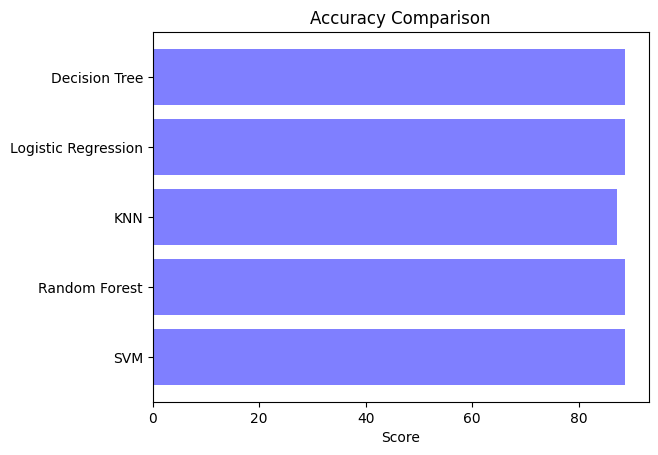

In [172]:
plt2.barh(y_pos1, score1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos1, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

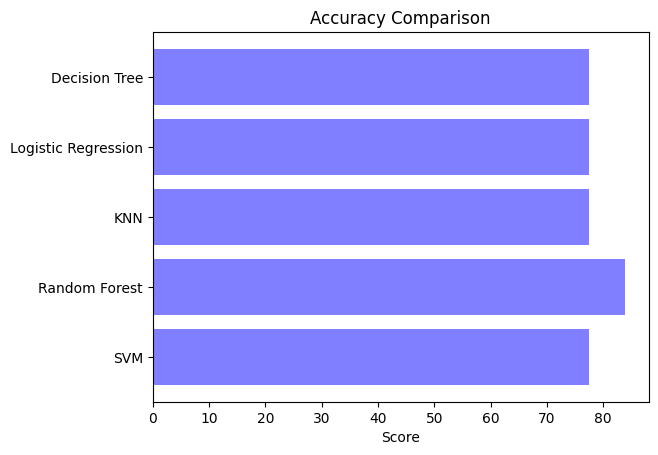

In [155]:
import matplotlib.pyplot as plt2
plt2.barh(y_poss1, scores1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_poss1, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [199]:
result1 ={'Accuracy': [svm_resultv*100,rf_resultr*100,knn_resultk*100,log_resultl*100,dc_resultd*100],
 'Recall':[recall_svmv*100,recall_rfr*100,recall_knnk*100,recall_logl*100,recall_dcd*100],
 'Precision': [precision_svmv*100,precision_rfr*100,precision_knnk*100,precision_logl*100,precision_dcd*100]}
index = ['SVM','Random Forest','KNN','Logistic Regression','Decision Tree']

In [200]:
result1s ={'Accuracy': [svm_resultvs*100,rf_resultrs*100,knn_resultks*100,log_resultls*100,dc_resultds*100],
 'Recall':[recall_svmvs*100,recall_rfrs*100,recall_knnks*100,recall_logls*100,recall_dcds*100],
 'Precision': [precision_svmvs*100,precision_rfrs*100,precision_knnks*100,precision_logls*100,precision_dcds*100]}
index = ['SVM','Random Forest','KNN','Logistic Regression','Decision Tree']

In [207]:
result1 =pd.DataFrame(result1,index=index)

In [208]:
result1s =pd.DataFrame(result1s,index=index)

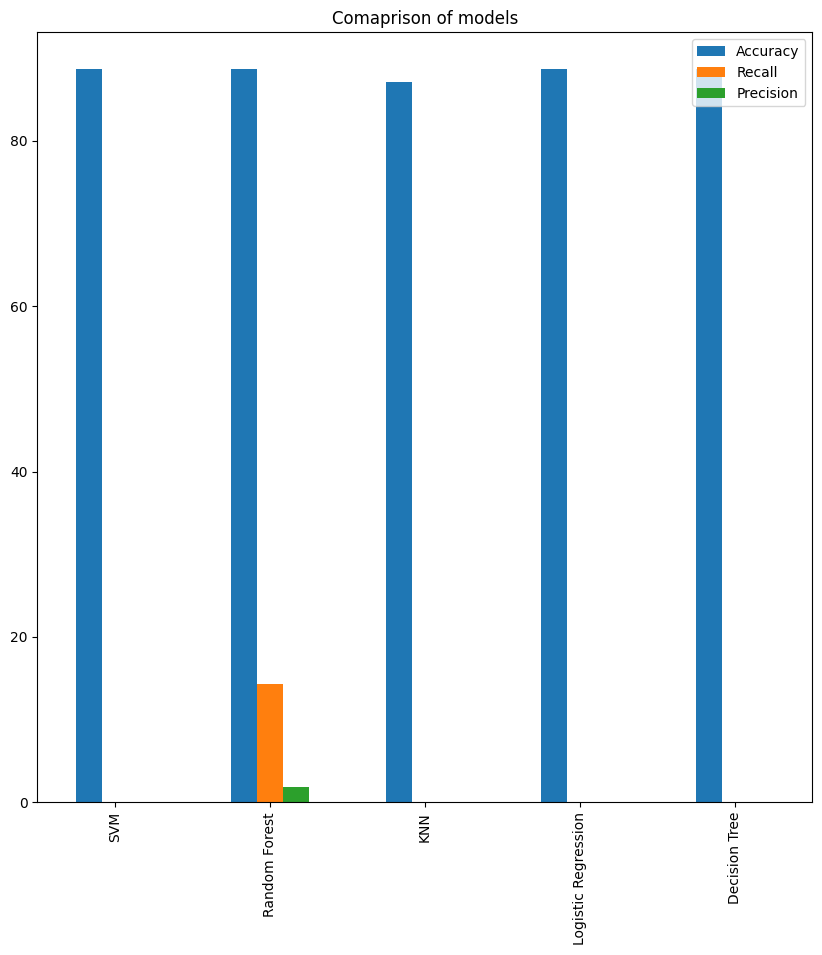

In [209]:
fig =result1.plot(kind='bar',title='Comaprison of models',figsize =(10,10)).get_figure()


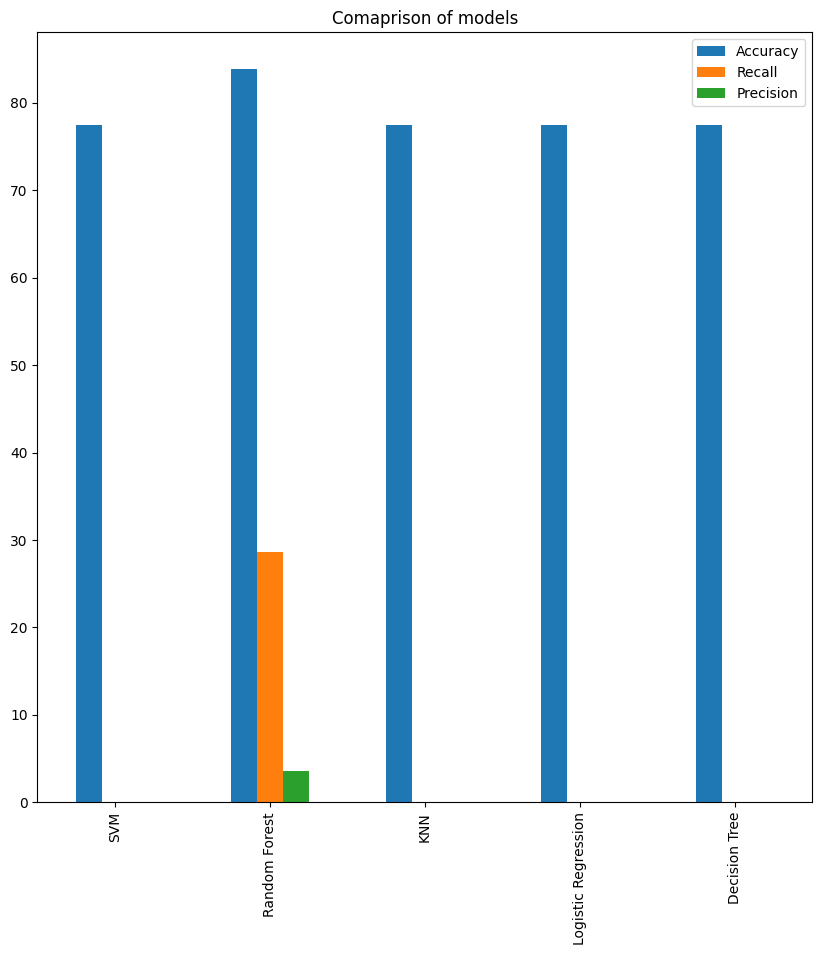

In [210]:
fig =result1s.plot(kind='bar',title='Comaprison of models',figsize =(10,10)).get_figure()
